<a href="https://colab.research.google.com/github/ashwaj15/IMG-TO-PENCIL-SKETCH/blob/main/Img_to_Pencil_Sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMAGE TO PENCIL SKETCH**





>We need to read the image in RBG format and then convert it to a grayscale image. This will turn an image into a classic black and white photo. Then the next thing to do is invert the grayscale image also called negative image, this will be our inverted grayscale image. Inversion can be used to enhance details. Then we can finally create the pencil sketch by mixing the grayscale image with the inverted blurry image. This can be done by dividing the grayscale image by the inverted blurry image. Since images are just arrays, we can easily do this programmatically using the divide function from the cv2 library in Python.





## **1. Importing required libraries**

In [2]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

## **2. Loading the image**



* Using the below code snippet, we will read the image that is to be processed.



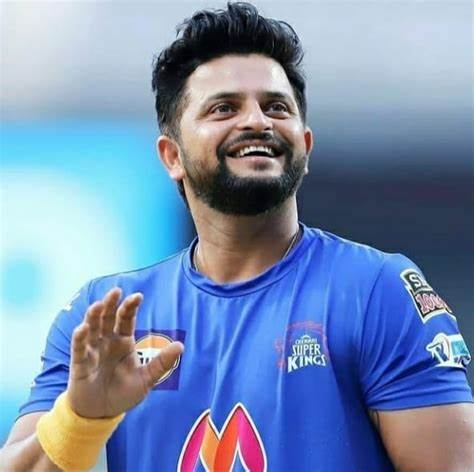

In [3]:
img = cv2.imread('/content/raina.jpg')

cv2_imshow(img)

## **3. Reading the image in RGB format**

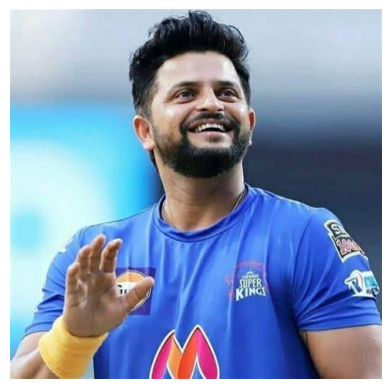

In [4]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.axis(False)
plt.savefig('temp.png')
plt.show()

## **4. Converting the RGB image format into grey scale image**

* Using the below code snippet, we will convert the RGB image format into equivalent grey-scale using cv2.cvtColor.

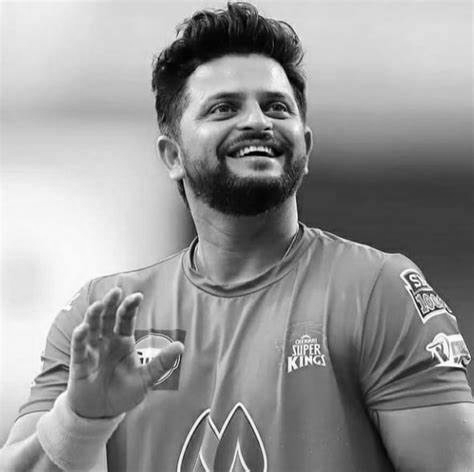

In [9]:
img_gray =cv2.cvtColor(RGB_img,cv2.COLOR_BGR2GRAY) 
cv2_imshow(img_gray)

>Converting an RGB image format into grayscale gives us black & white pixels in the image which is used for creating a pencil sketch. 

## **5. Inverting the grey scale image**

* Using the below code snippet, we will invert the image color using cv2.bitwise

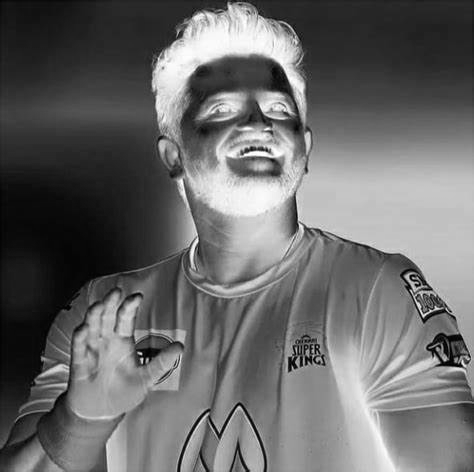

In [10]:
img_invert = cv2.bitwise_not(img_gray)  
cv2_imshow(img_invert)

>We are using the bitwise_not function which is used to make brighter regions lighter and vice versa so that we can find the edges to create a pencil sketch. 

## **6. Smoothing the image**

* In the below code snippet, we will smooth the image using Gaussian Blur.

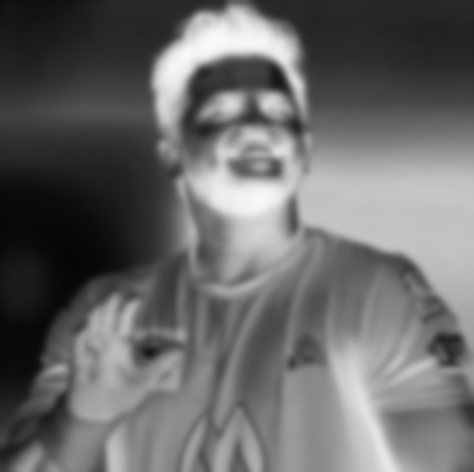

In [11]:
img_smoothing = cv2.GaussianBlur(img_invert, (21, 21),sigmaX=0, sigmaY=0)

cv2_imshow(img_smoothing)



>We have used the gaussian blur technique with 21 x 21 pixel and the default sigma values filter on the image to smoothen our image. By increasing the filter size, we can create thin lines for our sketch and it is used to reduce the noise in the image. 

## **7. Obtaining the final sketch**

* Using the below code snippet, we will obtain the final pencil sketch of the image using a blend function dodgev2.

In [12]:
def dodgeV2(x, y):

    return cv2.divide(x, 255 - y, scale=256)

> By using this function, it is dividing the greyscale value of the image by the inverse of blurred image value which highlights the boldest edges. This technique is used by traditional photographers to print photos from the reel.

## **8. Final Output as Pencil Sketch**

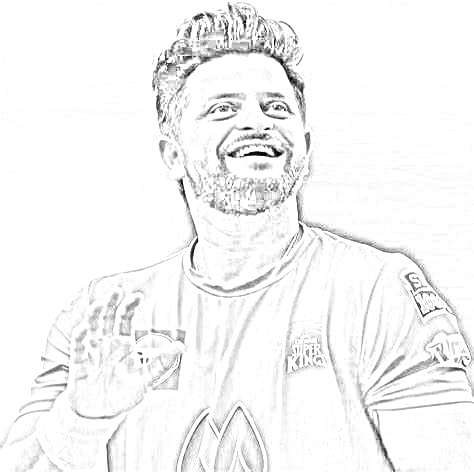

In [13]:
final_img = dodgeV2(img_gray, img_smoothing)

cv2_imshow(final_img)



>Here is the one-by-one transformations from the input image to the output image.

# ***THANK YOU...***